In [1]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

In [36]:
import pandas as pd
url = 'https://www.ngdc.noaa.gov/stp/space-weather/solar-data/solar-features/solar-radio/noontime-flux/penticton/penticton_adjusted/listings/listing_drao_noontime-flux-adjusted_daily.txt'
# response = requests.get(url)

df = pd.read_csv(url, delim_whitespace=True, skiprows=19, header=None, names=['Date', 'value'])
df


,Date,value
0,19470120,NaN
1,19470121,NaN
2,19470122,NaN
3,19470123,NaN
4,19470124,NaN
...,...,...
26028,20180426,70.3
26029,20180427,69.6
26030,20180428,71.1
26031,20180429,72.2


In [43]:
df = df.loc[44:, :]

In [66]:
df[:10]

,Date,value
44,19470305,306.1
45,19470306,306.0
46,19470307,321.4
47,19470308,345.6
48,19470309,NaN
49,19470310,325.9
50,19470311,303.3
51,19470312,305.3
52,19470313,359.5
53,19470314,267.2


In [71]:
import re

df['value'] = [float(re.sub(r'\+', '', i)) if type(i)==str else None for i in df['value']]

In [73]:
df['value'] = df['value'].interpolate()

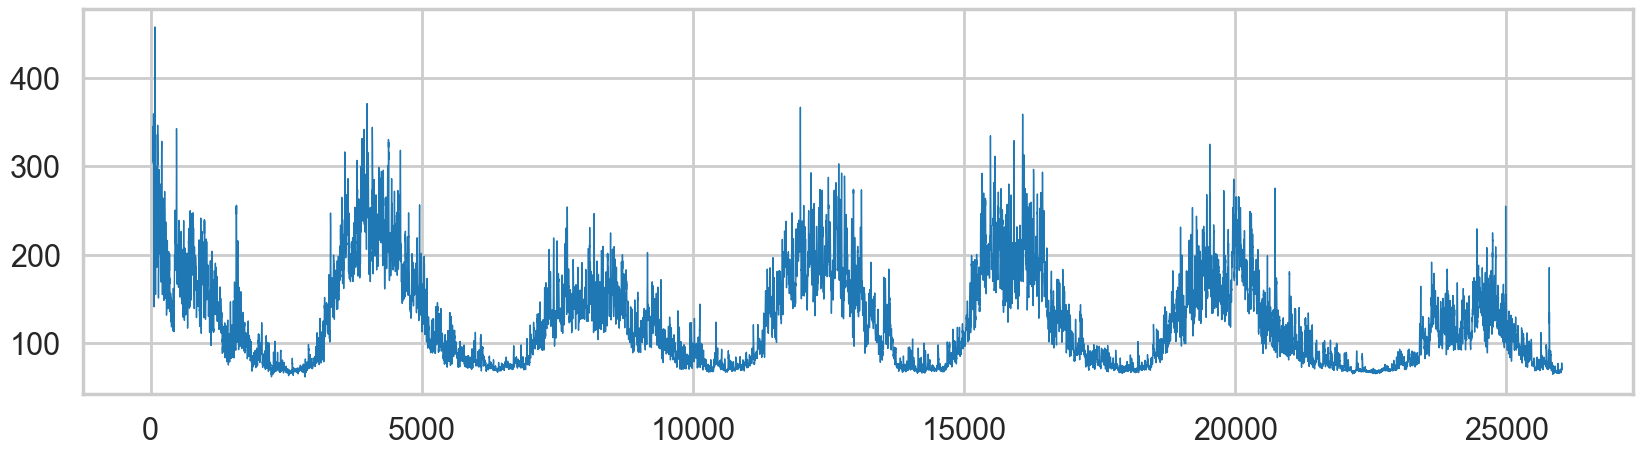

In [81]:
plt.figure(figsize=(20, 5))
plt.plot(df['value'], linewidth=1)

In [84]:
import pickle

with open('./data/f10-7.pkl', 'wb') as f:
    pickle.dump(df, f)

In [85]:
with open('./data/solar_cycle_data.pkl', 'rb') as f:
    data = pickle.load(f)

In [92]:
data

,x,y
3069,2004.833333,137.56
3070,2004.916667,115.98
3071,2005.000000,95.66
3072,2005.083333,102.86
3073,2005.166667,97.30
...,...,...
3293,2023.500000,162.39
3294,2023.583333,177.53
3295,2023.666667,153.92
3296,2023.750000,155.74


<AxesSubplot:>

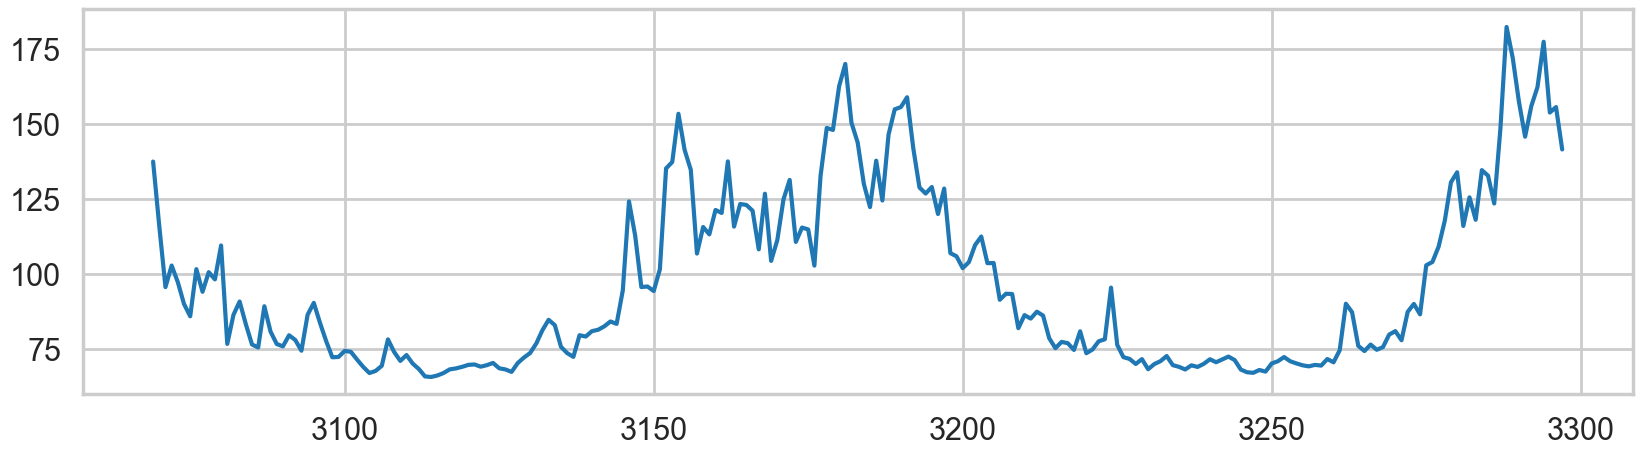

In [91]:
plt.figure(figsize=(20, 5))
data['y'].plot()